# Curso de Python do Zero ao DS
## Profº Meigarom
### Canal: Seja um Data Scientist


## Agenda

* 1.0 - O Problema do negócio
  * 1.1 - A Empresa: House Rocket
  * 1.2 - As perguntas do contratante (CEO)
* 2.0 - Planejamento da solução
  * 2.1 - Planejamento do produto final
  * 2.2 - Planejamento das ferramentas
  * 2.3 - Planejamento do processo
* 3.0 - Resolução/Exercícios
* 4.0 - Entrega

# 1.0 - O Problema do negócio

## 1.1 - A Empresa: House Rocket
* O que faz? 
    * Plataforma de compras e vendas de imóveis.
* Qual é o problema? 
    * O CEO da empresa gostaria de maximizar os lucros encontrando bons negócios.
* Qual é a principal estratégia?
    * Fontes externas para encontrar bons negócios.


## 1.2 - As perguntas do contratante (CEO):

0. Carregando biblioteca e dataset

In [1]:
import pandas as pd
# Retirar notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

dados = pd.read_csv('datasets/kc_house_data.csv')
dados.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00           0     0  ...      7        1180              0   
1      7242    2.00           0     0  ...      7        2170            400   
2     10000    1.00           0     0  ...      6         770              0   
3      5000    1.00           0     0  ...      7        1050            910   
4      8080    1.00           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.51 -122.26           1340        5650  
1      1951          1991    98125 47.72 -122.32           1690        7639  
2      1933             0    98028 47.74 -122.23           2720        8062  
3      1965             0    98136 47.52 -122.39           1360        5000  
4      1987             0    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

1. Qual o número de imóveis por ano de construção?
> Contar o número de IDs por ano de contrução.

In [2]:
dados[['id','yr_built']].groupby('yr_built').count()

id
yr_built     
1900       87
1901       29
1902       27
1903       46
1904       45
...       ...
2011      130
2012      170
2013      201
2014      559
2015       38

[116 rows x 1 columns]

2. Qual é o menor número de quartos por ano de contrução de imóveis?

> Filtrar todos os imóveis por ano de construção;
> Selecionar o menor número de quartos.

In [3]:
dados[['bedrooms','yr_built']].groupby('yr_built').min()

bedrooms
yr_built          
1900             1
1901             2
1902             2
1903             1
1904             2
...            ...
2011             1
2012             2
2013             2
2014             1
2015             1

[116 rows x 1 columns]

3. Qual é o preço de compra mais alto por cada número de quarto?

> Filtrar todos os imóveis pelo número de quartos;
> Selecionar o de maior preço.

In [4]:
dados[['price','bedrooms']].groupby('bedrooms').max()

price
bedrooms           
0        1295650.00
1        1247000.00
2        3278000.00
3        3800000.00
4        4489000.00
5        7062500.00
6        7700000.00
7        3200000.00
8        3300000.00
9        1400000.00
10       1148000.00
11        520000.00
33        640000.00

4. Qual a soma de todos os preços de compra por cada número de quartos?

> Filtrar todos os imóveis por número de quartos;
> Somar todos os preços.

In [5]:
dados[['price','bedrooms']].groupby('bedrooms').sum()

price
bedrooms              
0           5323550.00
1          63210934.00
2        1107788602.00
3        4580263939.00
4        4372957028.00
5        1259346326.00
6         224541613.00
7          36145017.00
8          14366000.00
9           5363999.00
10          2458000.00
11           520000.00
33           640000.00

5. Qual a soma de todos os preços de compra pelo número de quartos e banheiros?

> Filtrar todos os imóveis por número de quartos;
> Filtrar todos os imóveis por número de banheiros;
> Somar todos os preços.

In [6]:
dados[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms','bathrooms']).sum()

price
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

In [7]:
dados[['price', 'bedrooms', 'bathrooms']].groupby(['bathrooms','bedrooms']).sum()

price
bathrooms bedrooms           
0.00      0        3642600.00
          1         839000.00
0.50      1         255000.00
          2         382000.00
          4         312500.00
...                       ...
6.75      7         800000.00
7.50      9         450000.00
7.75      6        6885000.00
8.00      6        7700000.00
          7        2280000.00

[144 rows x 1 columns]

6. Qual o tamanho médio das salas dos imóveis por ano de construção?

> Filtrar todos os imóveis por ano de construção;
> Fazer a média do tamanho da sala.

In [8]:
dados[['sqft_living','yr_built']].groupby('yr_built').mean()

sqft_living
yr_built             
1900          1732.01
1901          1763.62
1902          1919.63
1903          1507.74
1904          1603.18
...               ...
2011          2313.68
2012          2378.74
2013          2636.59
2014          2615.39
2015          2596.32

[116 rows x 1 columns]

7. Qual o tamanho mediano das salas dos imóveis por ano de construção?

> Filtrar todos os imóveis por ano de construção;
> Fazer a mediana do tamanho da sala.

In [9]:
dados[['sqft_living','yr_built']].groupby('yr_built').median()

sqft_living
yr_built             
1900          1540.00
1901          1610.00
1902          1600.00
1903          1505.00
1904          1280.00
...               ...
2011          2270.00
2012          2237.50
2013          2580.00
2014          2650.00
2015          2590.00

[116 rows x 1 columns]

8. Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

> Filtrar todos os imóveis por ano de construção;
> Fazer o desvio padrão do tamanho da sala.

In [10]:
dados[['sqft_living','yr_built']].groupby('yr_built').std()

sqft_living
yr_built             
1900           732.94
1901           668.23
1902           878.66
1903           469.72
1904          1076.87
...               ...
2011           804.86
2012           771.43
2013           883.50
2014           893.81
2015          1155.61

[116 rows x 1 columns]

9. Como é o crescimento médio preços de compra dos imóveis, por dia e semana do ano?

> Filtrar todos os imóveis por ano;
> Plotar gráfico onde x:ano e y:media do preço/ano;
> Biblioteca para plotar gráfico de linhas.

In [11]:
from matplotlib import pyplot as plt

In [12]:
# First Graph

dados['year'] = pd.to_datetime(dados['date']).dt.year

by_year = dados[['price','year']].groupby('year').sum().reset_index()

plt.figure( figsize=(20,12))
plt.bar( by_year['year'], by_year['price'])

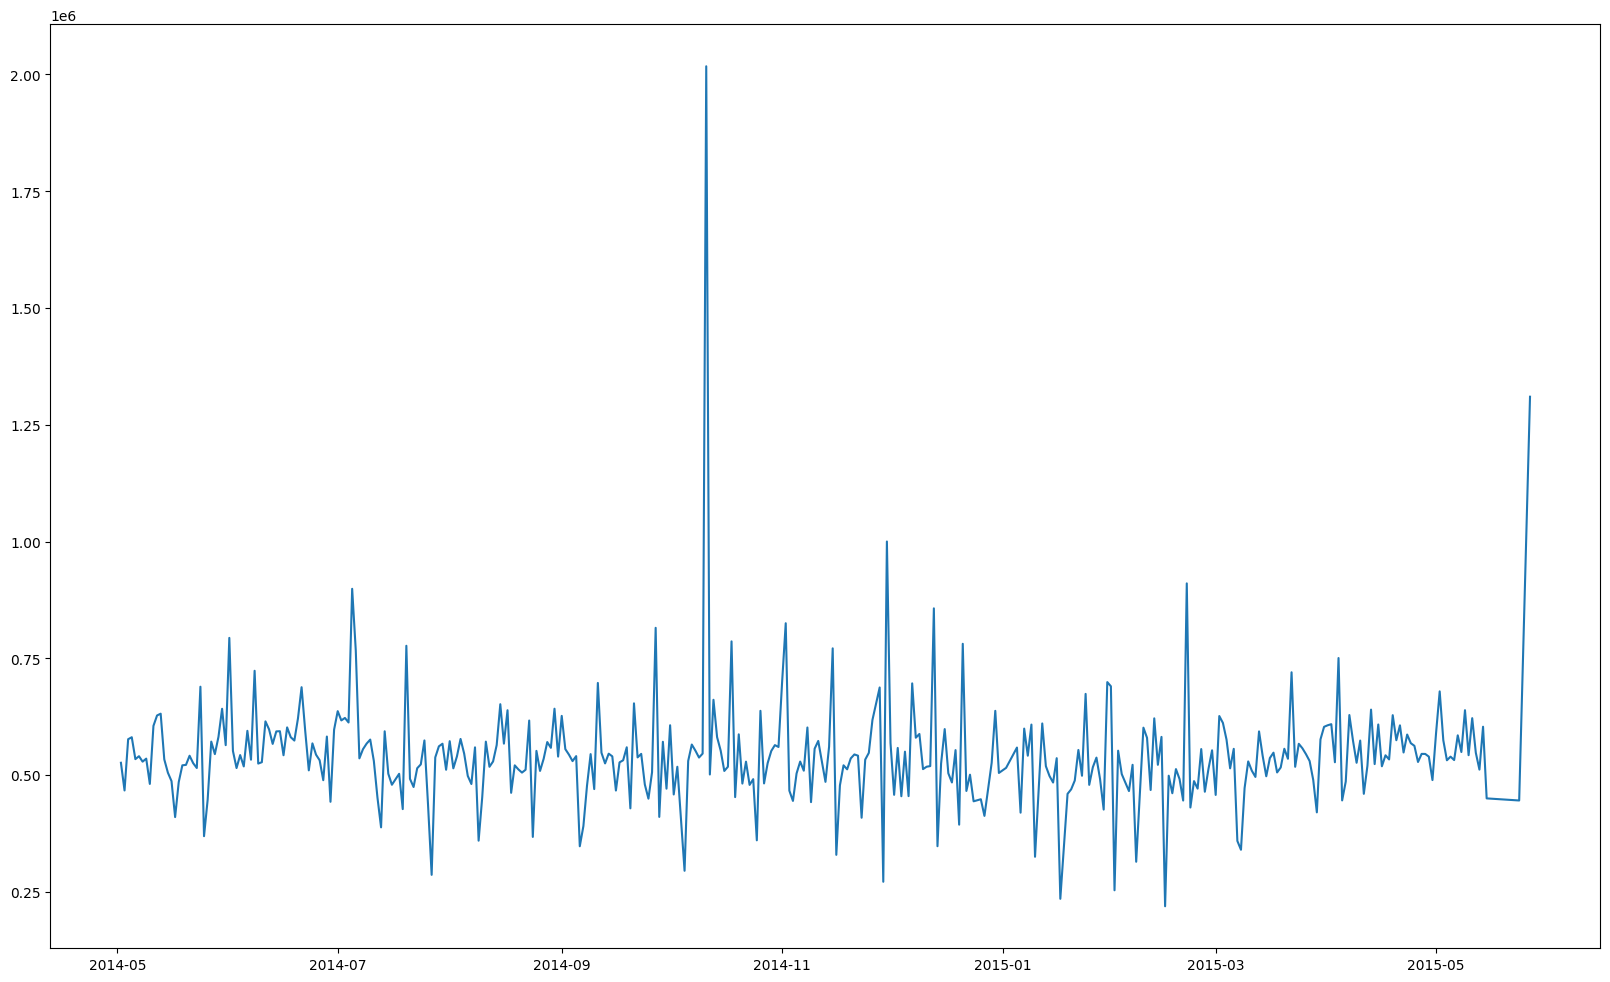

In [ ]:
# Second Graph

dados['day'] = pd.to_datetime(dados['date'])

by_day = dados[['price','day']].groupby('day').mean().reset_index()

plt.figure( figsize=(20,12))
plt.plot( by_day['day'], by_day['price'])

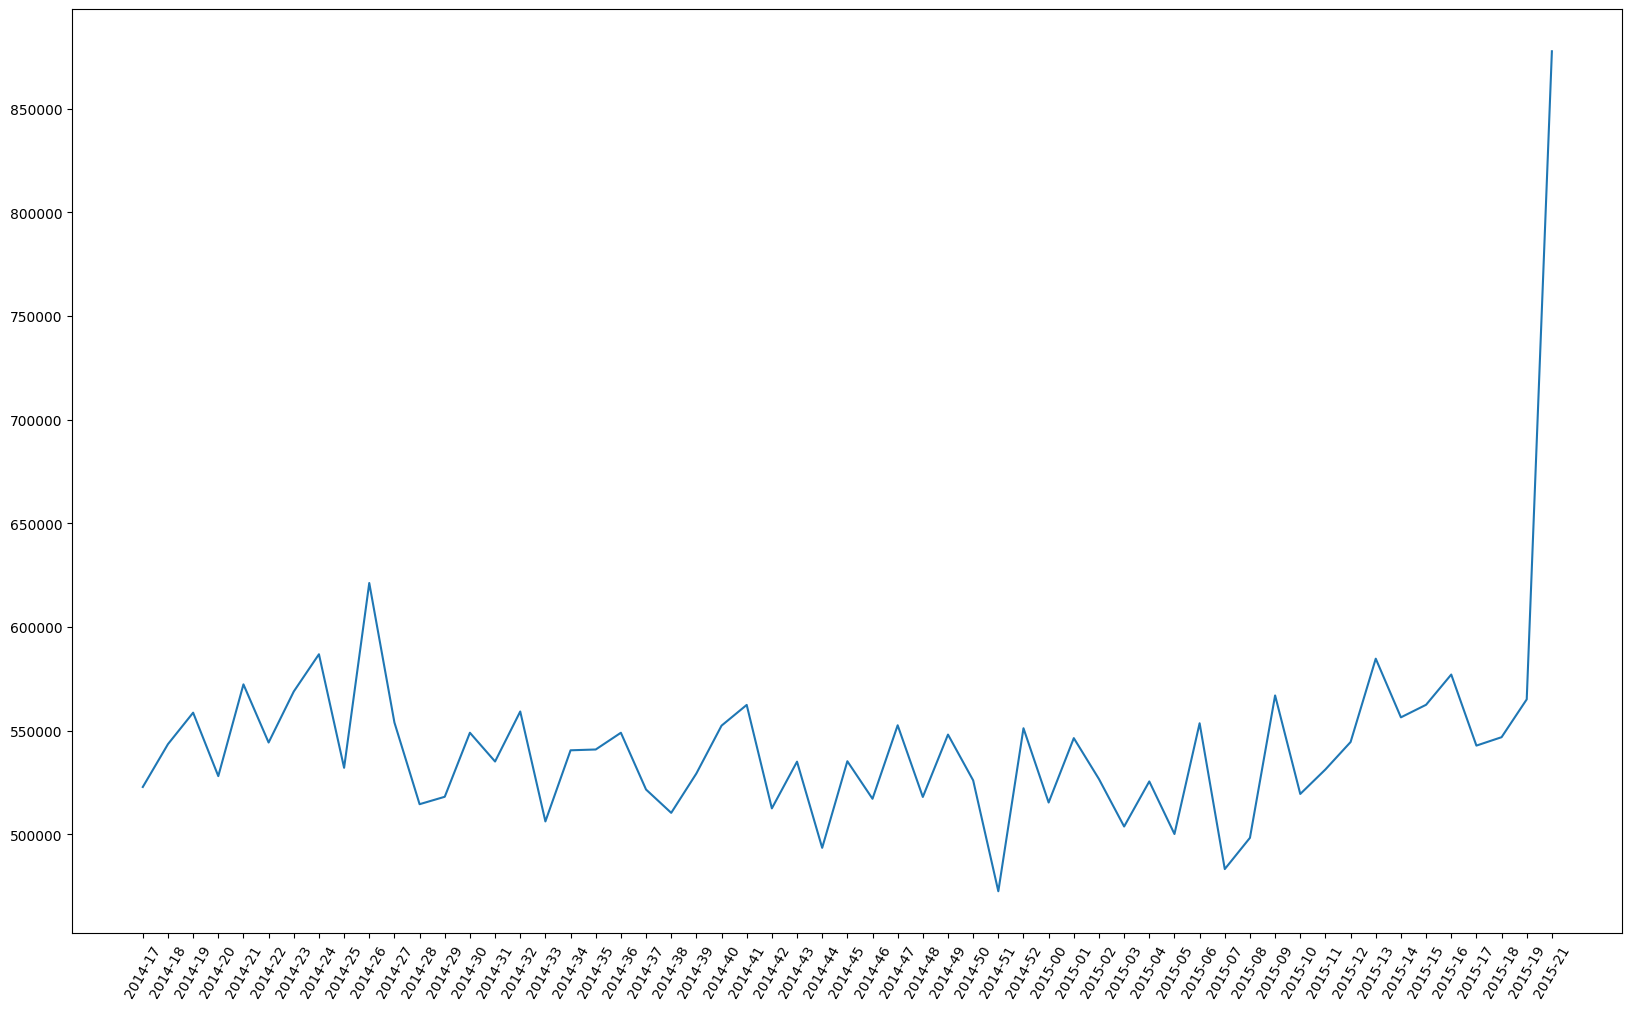

In [ ]:
# Third Graph

dados['year_week'] = pd.to_datetime(dados['date']).dt.strftime("%Y-%U")
by_year_week = dados[['price','year_week']].groupby('year_week').mean().reset_index()

plt.figure( figsize=(20,12))
plt.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks( rotation=60);

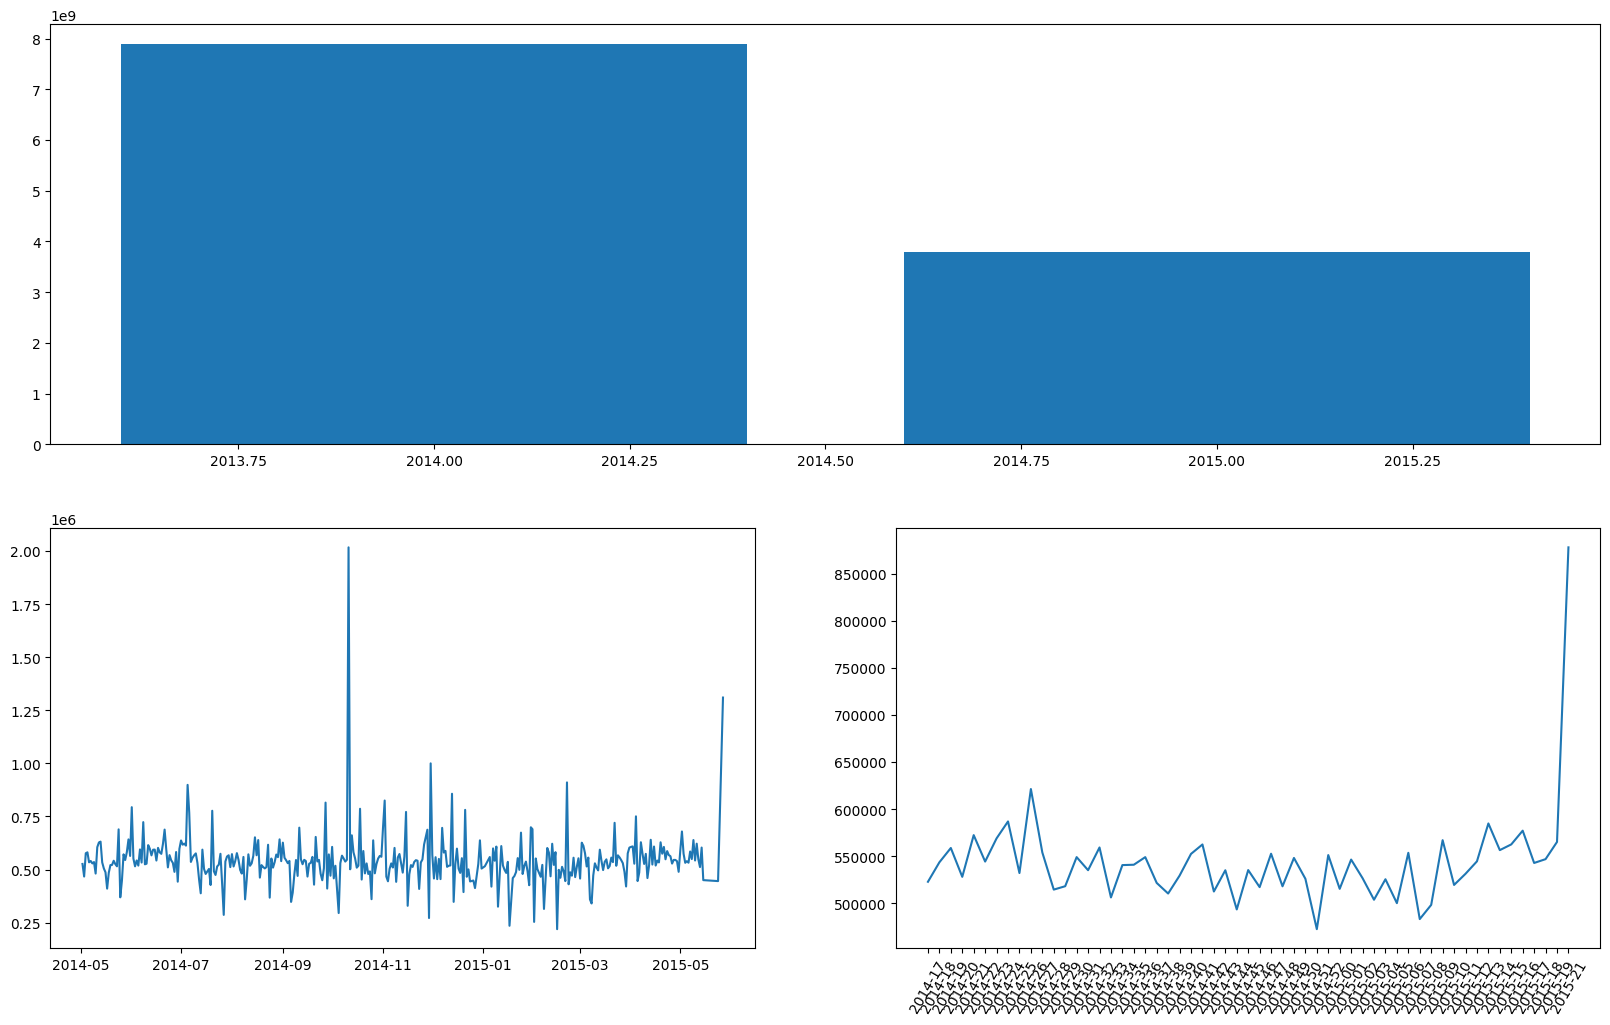

In [ ]:
# Dashboard
from matplotlib import gridspec

fig = plt.figure( figsize=(20,12))
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot( specs[0, :] ) # first row
ax2 = fig.add_subplot( specs[1, 0] ) # second row - first column
ax3 = fig.add_subplot( specs[1, 1] ) # second row - second column

# First Graph
dados['year'] = pd.to_datetime(dados['date']).dt.year
by_year = dados[['price','year']].groupby('year').sum().reset_index()
ax1.bar( by_year['year'], by_year['price'])

# Second Graph
dados['day'] = pd.to_datetime(dados['date'])
by_day = dados[['price','day']].groupby('day').mean().reset_index()
ax2.plot( by_day['day'], by_day['price'])

# Third Graph
dados['year_week'] = pd.to_datetime(dados['date']).dt.strftime("%Y-%U")
by_year_week = dados[['price','year_week']].groupby('year_week').mean().reset_index()
ax3.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks( rotation=60);


10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

> Modificar o gráfico da aula anterior:
>   Os pontos devem ter o tamanho proporcional ao preço.

In [ ]:
import plotly.express as px
 
houses = dados[['id','lat','long','price']]

mapa = px.scatter_mapbox(    houses,
                            lat='lat',
                            lon='long',
                            hover_name='id',
                            size='price',
                            color_continuous_scale=px.colors.cyclical.IceFire,
                            size_max=15,
                            zoom=10,        
                            height=100)

mapa.update_layout( mapbox_style = 'open-street-map' )
mapa.update_layout( height=600, margin={'r':0,'l':0,'t':0, 'b':0})
mapa.show()
mapa.write_html('entregas/hr30_Q10_mapa.html')

# 2.0 - Planejamento da solução

## 2.1 - Planejamento do produto final
* E-mail + 2 anexos:
  * E-mail: Pergunta | Resposta;
  * Anexo1: Dashboard com 3 gráficos;
  * Anexo2: Mapa no formato html.

## 2.2 - Planejamento das ferramentas
* Python 3.9.2;
* Jupyter Notebook;
* VSCode.

## 2.3 - Planejamento do processo
1. Qual o número de imóveis por ano de construção?
2. Qual o menor número de quartos por ano de construção dos imóveis?
3. Qual o preço de compra mais alto por cada número de quartos?
4. Qual a soma de todos os preços de compra por cada número de quartos?
5. Qual a soma de todos os preços de compra pelo número de quartos e banheiros?
6. Qual o tamanho médio das salas dos imóveis por ano de construção?
7. Qual o tamanho mediano das salas dos imóveis por ano de construção?
8. Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?
9. Como é o crescimento médio preços de compra dos imóveis, por dia e semana do ano?
10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

# 3.0 - Exercícios e Resolução

0. Import and Settings 

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px
from IPython.core.display import HTML

In [ ]:
def jupyter_settings():
    %matplotlib inline
    # %pylab inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [12,6]
    plt.rcParams['font.size'] = 24
    # display( HTML( '<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    sns.set()

# jupyter_settings()

In [5]:
df = pd.read_csv('datasets/kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

1. Crie uma nova coluna chamada: “dormitory_type”
- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
- Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [6]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [7]:
df['dormitory_type'] = df['bedrooms'].apply(lambda x: 
                'studio'        if x == 1 else 
                'apartment'     if x == 2 else
                'house'         if x > 2 else 'NotClassified')    
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  dormitory_type  
0        5650           house  
1        7639           house  
2        8062       apartment  
3        5000           house  
4        7503           house  

[5 rows x 22 columns]

2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

In [8]:
tab2 = df[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
tab2

bedrooms         price
0          0  5.323550e+06
1          1  6.321093e+07
2          2  1.107789e+09
3          3  4.580264e+09
4          4  4.372957e+09
5          5  1.259346e+09
6          6  2.245416e+08
7          7  3.614502e+07
8          8  1.436600e+07
9          9  5.363999e+06
10        10  2.458000e+06
11        11  5.200000e+05
12        33  6.400000e+05

<BarContainer object of 13 artists>

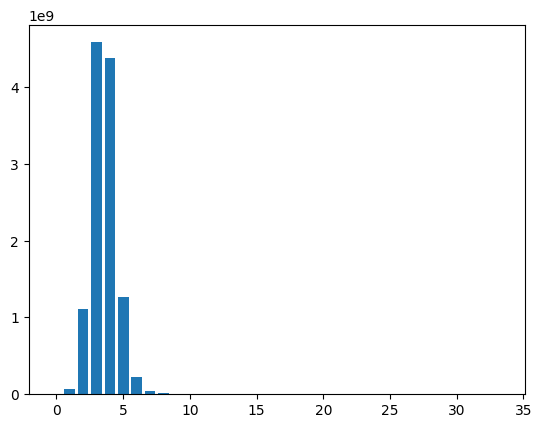

In [9]:
plt.bar(tab2['bedrooms'], tab2['price'])

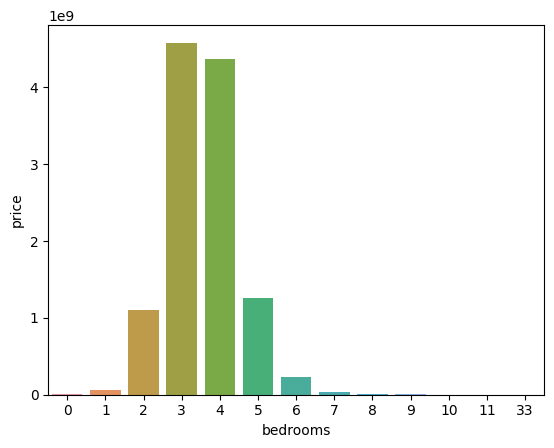

In [10]:
# plt.figure(figsize=(24,12))
sns.barplot(data=tab2, x='bedrooms', y='price');


3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

In [11]:
tab3 = df[['price', 'yr_built']].groupby(['yr_built']).mean().reset_index()
tab3.head()

yr_built          price
0      1900  581387.206897
1      1901  556935.931034
2      1902  673007.407407
3      1903  480958.195652
4      1904  583756.644444

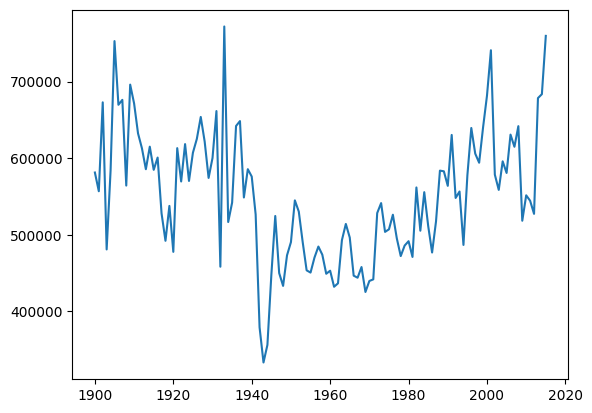

In [12]:
plt.plot(tab3['yr_built'],tab3['price']);

<AxesSubplot: xlabel='yr_built', ylabel='price'>

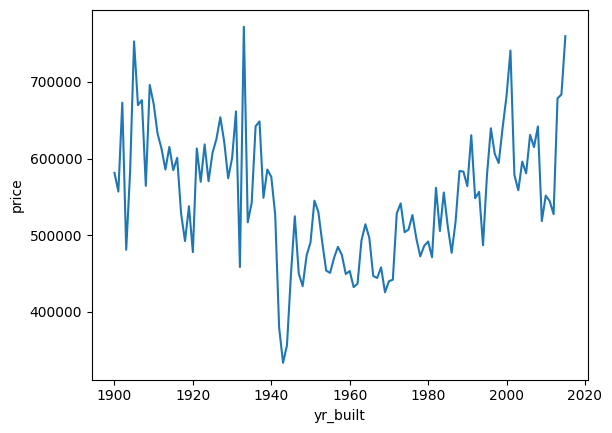

In [13]:
sns.lineplot(data=tab3,x='yr_built',y='price')

4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

In [14]:
tab4 = df[['price','dormitory_type']].groupby(['dormitory_type']).mean().reset_index()
tab4

dormitory_type          price
0  NotClassified  409503.846154
1      apartment  401372.681884
2          house  563092.211899
3         studio  317642.884422

<BarContainer object of 4 artists>

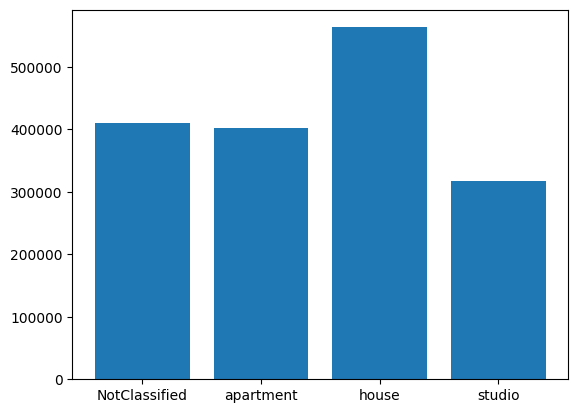

In [15]:
plt.bar(tab4['dormitory_type'],tab4['price'])

5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

In [16]:
df['yr_renovated'] = df['yr_renovated'].apply(
    lambda x:   pd.to_datetime('1900-01-01',format='%Y-%m-%d') if x == 0 else 
                pd.to_datetime(x, format='%Y') )

In [17]:
tab5 = df[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index().drop(0)
tab5.head()

yr_renovated          price
1   1934-01-01  459950.000000
2   1940-01-01  378400.000000
3   1944-01-01  521000.000000
4   1945-01-01  398666.666667
5   1946-01-01  351137.500000

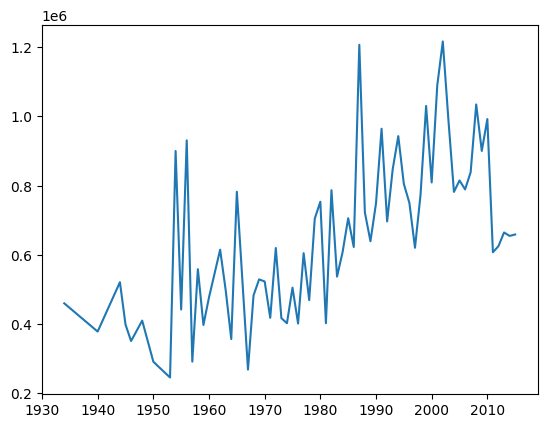

In [18]:
plt.plot(tab5['yr_renovated'], tab5['price'])

6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.


In [19]:
tab6 = df[['price','yr_built','dormitory_type']].groupby(['yr_built','dormitory_type']).mean().reset_index()
tab6.head()

yr_built dormitory_type          price
0      1900      apartment  589533.333333
1      1900          house  584854.271429
2      1900         studio  398944.000000
3      1901      apartment  452856.400000
4      1901          house  578619.166667

7. Crie um Dashboard com os gráficos das questões 02, 03, 04
( Dashboard: 2 Linha e 2 colunas )

<BarContainer object of 4 artists>

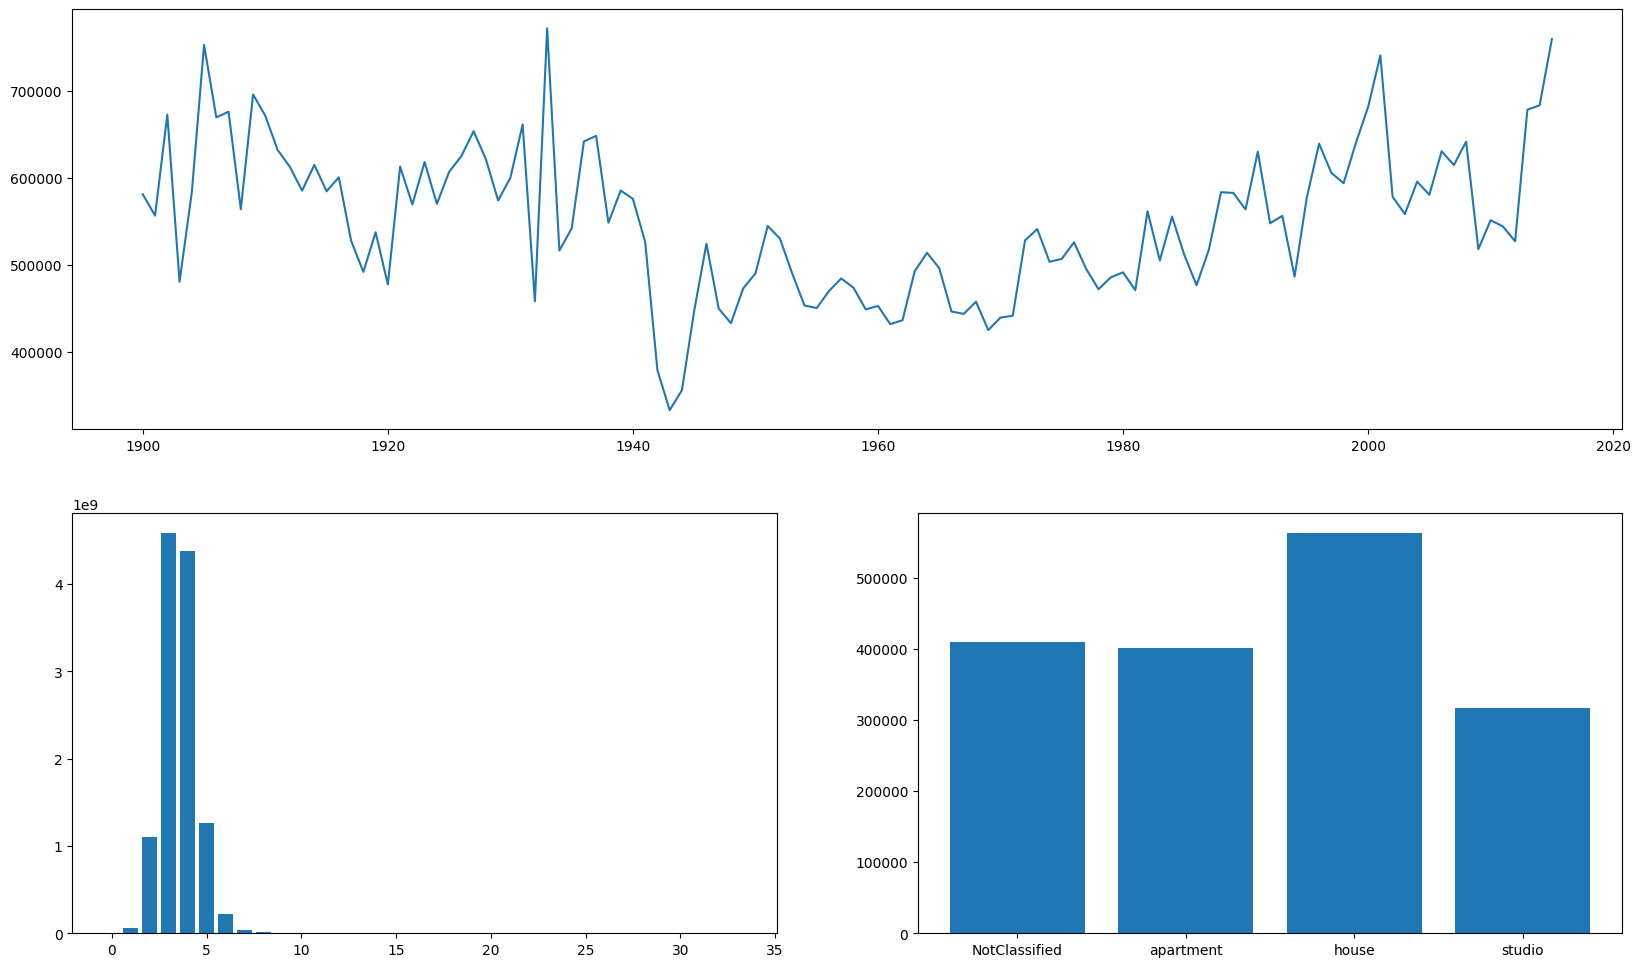

In [20]:
# Dashboard

fig = plt.figure( figsize=(20,12))
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot( specs[0, :] ) # first row
ax2 = fig.add_subplot( specs[1, 0] ) # second row - first column
ax3 = fig.add_subplot( specs[1, 1] ) # second row - second column

# First Graph
ax2.bar(tab2['bedrooms'], tab2['price'])

# Second Graph
ax1.plot(tab3['yr_built'],tab3['price'])

# Third Graph
ax3.bar(tab4['dormitory_type'],tab4['price'])


8. Crie um Dashboard com os gráficos das perguntas 02, 04
( Dashboard: 2 colunas )

<AxesSubplot: xlabel='dormitory_type', ylabel='price'>

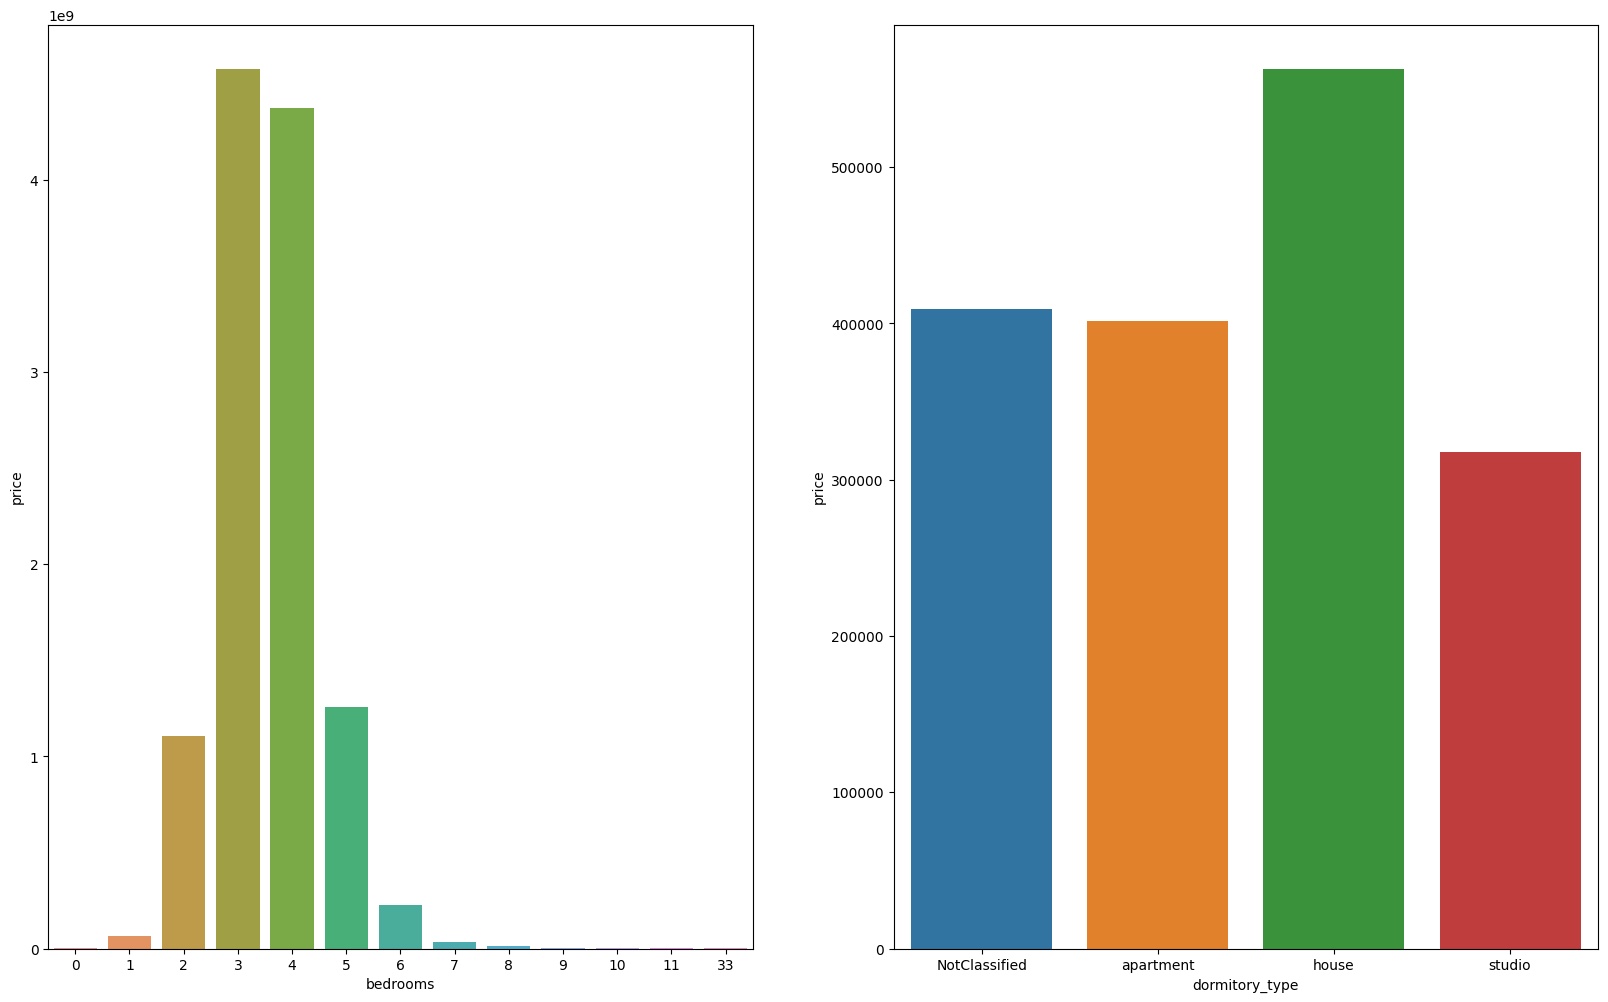

In [21]:
# Dashboard

fig = plt.figure( figsize=(20,12))
specs = gridspec.GridSpec( ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot( specs[0, 0] ) # first row
ax2 = fig.add_subplot( specs[0, 1] ) # second row - first column

# First Graph
# ax1.bar(tab2['bedrooms'], tab2['price'])
sns.barplot(data=tab2,x='bedrooms',y='price',ax=ax1)

# Second Graph
# ax2.bar(tab4['dormitory_type'],tab4['price'])
sns.barplot(data=tab4,x='dormitory_type',y='price',ax=ax2)

9. Crie um Dashboard com os gráficos das perguntas 03, 05
( Dashboard: 2 Linhas )

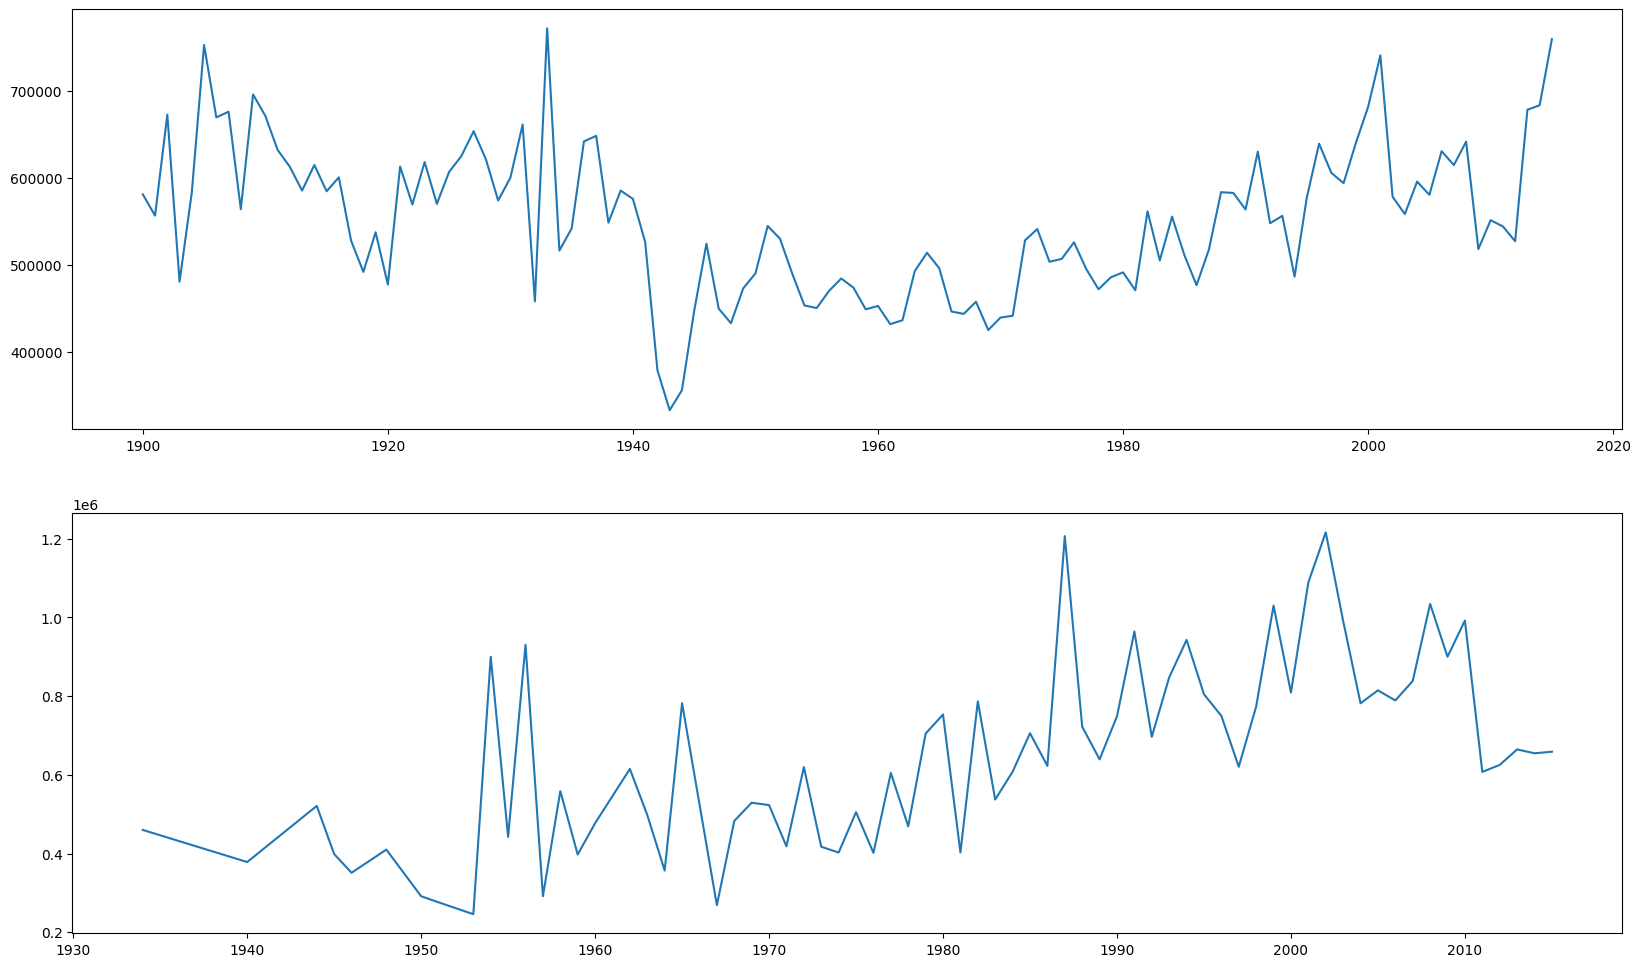

In [22]:
# Dashboard
fig = plt.figure( figsize=(20,12))
specs = gridspec.GridSpec( ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot( specs[0, 0] ) # first row
ax2 = fig.add_subplot( specs[1, 0] ) # second row - first column

# First Graph
ax1.plot(tab3['yr_built'],tab3['price'])

# Second Graph
ax2.plot(tab5['yr_renovated'].dt.year,tab5['price'])



10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar.

In [23]:
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
0             1180      5650     1.0           0     0  ...        1180   
1             2570      7242     2.0           0     0  ...        2170   
2              770     10000     1.0           0     0  ...         770   
3             1960      5000     1.0           0     0  ...        1050   
4             1680      8080     1.0           0     0  ...        1680   
...            ...       ...     ...         ...   ...  ...         ...   
21608         1530      1131     3.0           0     0  ...        1530   
21609         2310      5813     2.0           0     0  ...        2310   
21610         1020      1350     2.0           0     0  ...        1020   
21611         1600      2388     2.0           0     0  ...        1600   
21612         1020      1076     2.0           0     0  ...        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955    1900-01-01    98178  47.5112 -122.257   
1                400      1951    1991-01-01    98125  47.7210 -122.319   
2                  0      1933    1900-01-01    98028  47.7379 -122.233   
3                910      1965    1900-01-01    98136  47.5208 -122.393   
4                  0      1987    1900-01-01    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009    1900-01-01    98103  47.6993 -122.346   
21609              0      2014    1900-01-01    98146  47.5107 -122.362   
21610              0      2009    1900-01-01    98144  47.5944 -122.299   
21611              0      2004    1900-01-01    98027  47.5345 -122.069   
21612              0      2008    1900-01-01    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  dormitory_type  
0               1340        5650           house  
1               1690        7639           house  
2               2720        8062       apartment  
3               1360        5000           house  
4               1800        7503           house  
...              ...         ...             ...  
21608           1530        1509           house  
21609           1830        7200           house  
21610           1020        2007       apartment  
21611           1410        1287           house  
21612           1020        1357       apartment  

[21613 rows x 22 columns]

In [24]:
houses = df[['id','lat','long','sqft_living']]

mapa = px.scatter_mapbox(   houses,
                            lat='lat',
                            lon='long',
                            hover_name='id',
                            size='sqft_living',
                            color_continuous_scale=px.colors.cyclical.IceFire,
                            size_max=15,
                            zoom=12)

mapa.update_layout( mapbox_style = 'open-street-map' )
mapa.update_layout( height=600, margin={'r':0,'l':0,'t':0, 'b':0})
mapa.show()

In [ ]:
# mapa.write_html('entregas/hr30_E10_mapa.html')

In [ ]:
# mapa.write_image('entregas/hr30_E10_mapa.pdf', format='pdf')

In [ ]:
# mapa.write_image('entregas/hr30_E10_mapa.svg', format='svg')